## Dataset

In [8]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
rawdata = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

rawdata = rawdata.dropna(how='any',axis=0)

labels = rawdata["sex"]
data = rawdata.drop(['sex'],axis=1)
data['species_short'] = data['species_short'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes

# remove for outliar
data = data.replace(np.nan, 0)
labels = labels.replace(np.nan, 0)

data = (data-data.min())/(data.max()-data.min())
data

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333
5,0.0,1.0,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...
338,1.0,0.0,0.549091,0.071429,0.711864,0.618056
340,1.0,0.0,0.534545,0.142857,0.728814,0.597222
341,1.0,0.0,0.665455,0.309524,0.847458,0.847222
342,1.0,0.0,0.476364,0.202381,0.677966,0.694444


## PCA

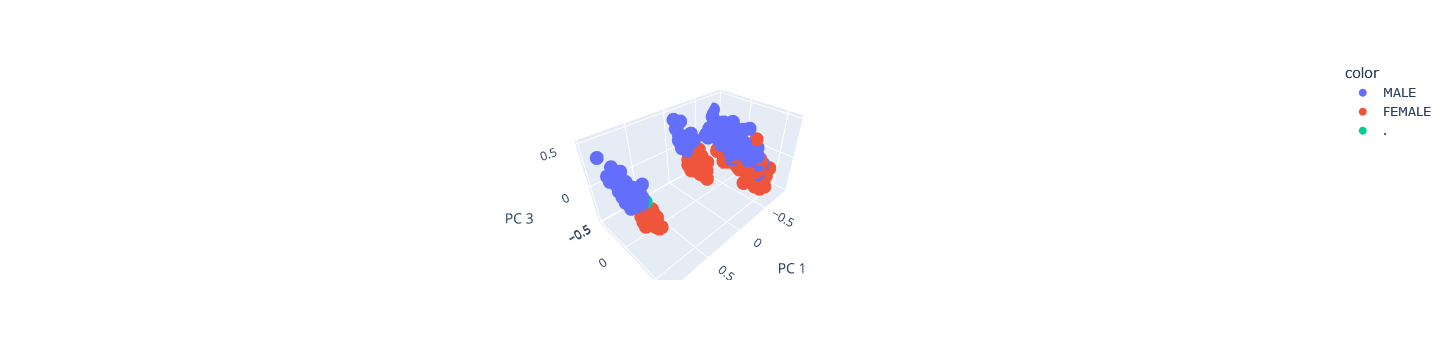

In [9]:
import plotly.express as px
pca = PCA(n_components=3)
components = pca.fit_transform(data)
fig = px.scatter_3d(components,x=0,y=1,z=2,color=labels,labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

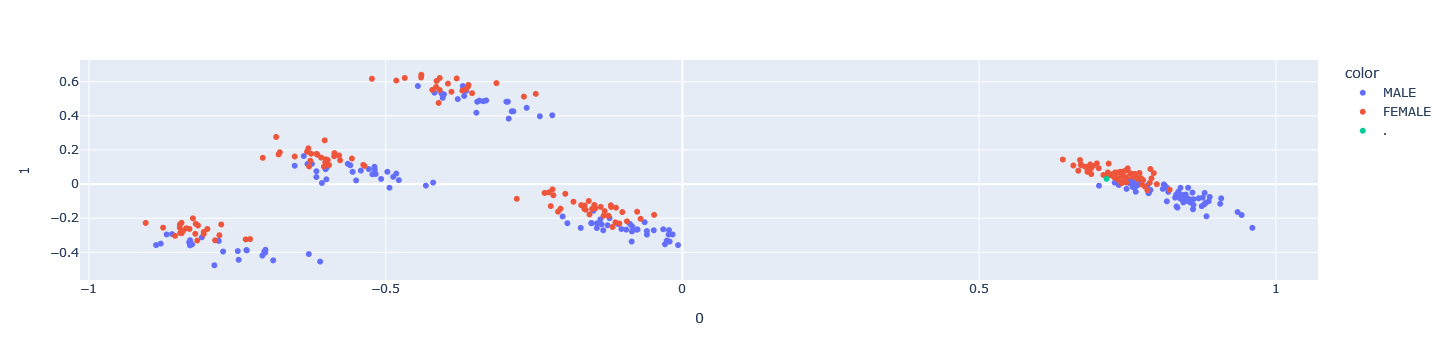

In [10]:
pca = PCA(n_components=2)
components = pca.fit_transform(data)
fig = px.scatter(components,x=0,y=1,color=labels)
fig.show()

# TSNE

C:\Users\Redio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Redio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



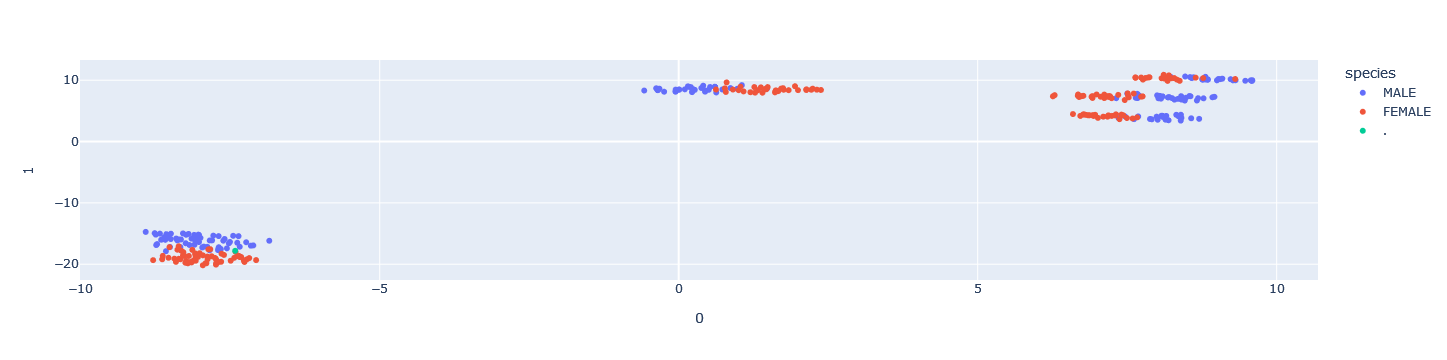

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,n_iter=1000,perplexity=80)
projections = tsne.fit_transform(data)
fig = px.scatter(
    projections, x=0, y=1,
    color=labels, labels={'color': 'species'}
)
fig.show()

# UMAP

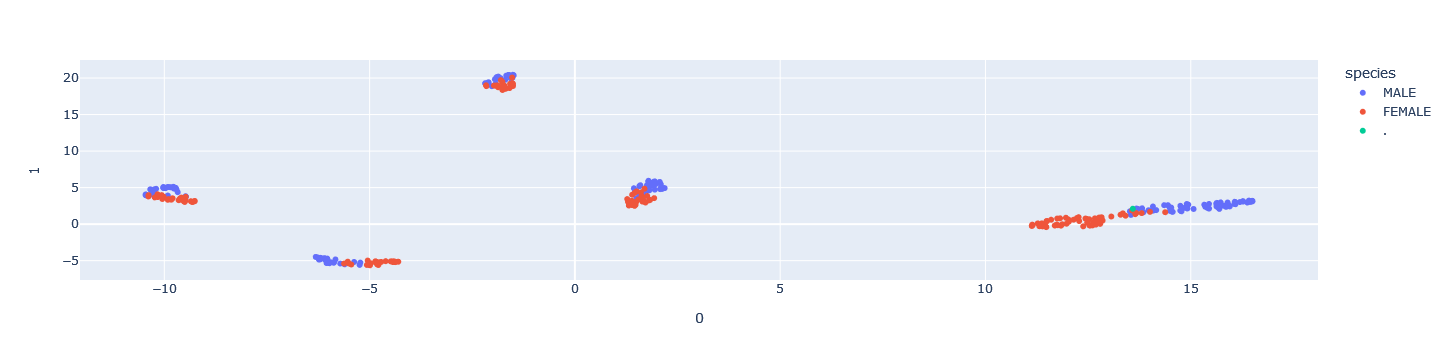

In [14]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)
fig = px.scatter(
    embedding, x=0, y=1,
    color=labels, labels={'color': 'species'}
)
fig.show()